In [4]:
import numpy as np
import pandas as pd
from math import ceil
import os
import random
import matplotlib.pylab as plt
import plotly.express as px
from zipfile import ZipFile
from PIL import Image, ImageEnhance; Image.MAX_IMAGE_PIXELS = 5_000_000_000

from sklearn.decomposition import PCA


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense,MaxPooling2D, MaxPool2D, Conv2D,Flatten,Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
#from tensorflow.keras.preprocessing import image


#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

#from kaggle_datasets import KaggleDatasets

In [8]:
df=pd.read_csv(r"C:\Users\Genet Shanko\Desktop\data\performance_data.csv")

In [9]:
df.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [12]:
df.tail()

,game_id,preview_link,ER,CTR
900,2443bd3b890824acecbe32659b9a1246,https://s3.eu-west-1.amazonaws.com/a.futureadl...,0.365997,0.008790
901,7ed73c1cc404f9956d26c5f58de72b2f,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103055,0.043215
902,90455f5ace15860874965eabd081b6f2,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.191425,0.038692
903,adunit-chevy-hotspot-cpe-av-mpu,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.073058,0.000057
904,adunit-facebook-conversational-commerce-3-0-vn...,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.085290,0.000000


In [13]:
df.CTR.describe() 

count    905.000000
mean       0.034466
std        0.036967
min        0.000000
25%        0.007926
50%        0.024537
75%        0.047796
max        0.297410
Name: CTR, dtype: float64

In [17]:
df.isnull()

,game_id,preview_link,ER,CTR
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
900,False,False,False,False
901,False,False,False,False
902,False,False,False,False
903,False,False,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


###### Engagement Rate (ER) - the number of engagements divided by the number of impressions,    Click Through Rate (CTR) - the number of clicks divided by the number of engagements

{'Mean': 0.13631813459979578,
 'Median': 0.1186235825246169,
 'Standard Dev': 0.09147339575984849}

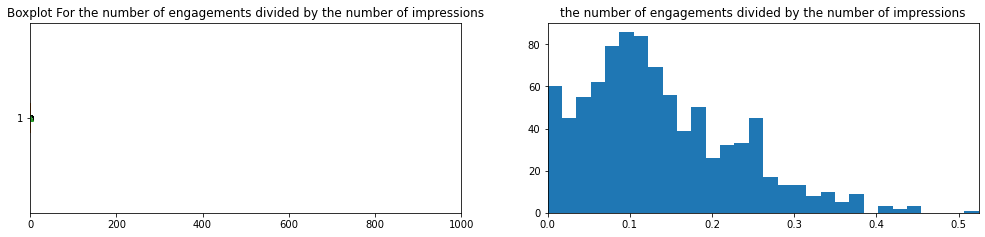

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df.ER, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df.ER+1000))
axes[0].set_title('Boxplot For the number of engagements divided by the number of impressions')
axes[1].hist(df.ER, cumulative=False, bins=30)
axes[1].set_title("the number of engagements divided by the number of impressions")
axes[1].set_xlim((min(df.ER), max(df.ER)))
{"Mean":np.nanmean(df.ER),"Median":np.nanmedian(df.ER),"Standard Dev":np.nanstd(df.ER)}

{'Mean': 0.03446550402964832,
 'Median': 0.0245367505187666,
 'Standard Dev': 0.036946925452040355}

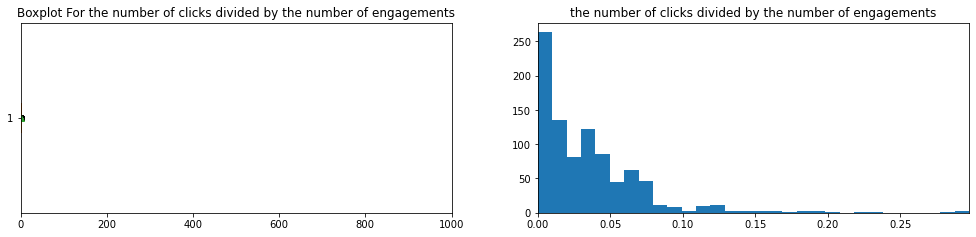

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df.CTR, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df.CTR+1000))
axes[0].set_title('Boxplot For the number of clicks divided by the number of engagements')
axes[1].hist(df.CTR, cumulative=False, bins=30)
axes[1].set_title("the number of clicks divided by the number of engagements")
axes[1].set_xlim((min(df.CTR), max(df.CTR)))
{"Mean":np.nanmean(df.CTR),"Median":np.nanmedian(df.CTR),"Standard Dev":np.nanstd(df.CTR)}

In [43]:
df.isnull().sum().sum



<bound method NDFrame._add_numeric_operations.<locals>.sum of game_id         0
preview_link    0
ER              0
CTR             0
dtype: int64>

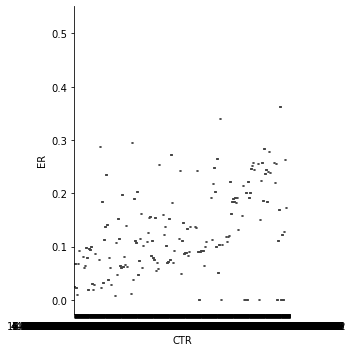

In [55]:
sns.catplot(x="CTR", y="ER", kind="box", data=df.query("CTR!=0"))

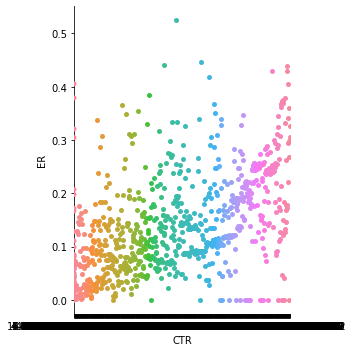

In [52]:
sns.catplot(x="CTR", y="ER", data=df)

In [35]:
pip install "cython>=0.29"

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: cython>=0.29 in c:\users\genet shanko\anaconda3\lib\site-packages (0.29.28)



C:\Users\Genet Shanko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ER', ylabel='Density'>

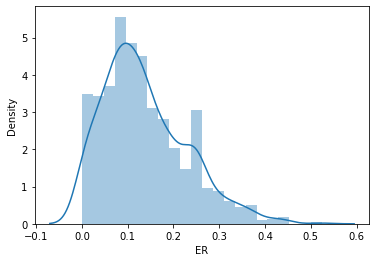

In [63]:
sns.distplot(df['ER'])

C:\Users\Genet Shanko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR', ylabel='Density'>

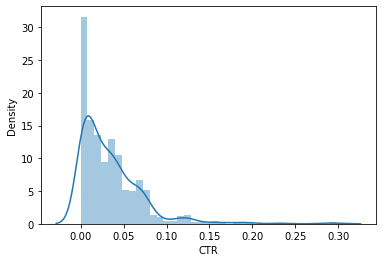

In [64]:
sns.distplot(df['CTR'])

In [71]:
#dremove un reponse users
def remove_users(df):
    clean_data = df.query("not (ER == 0 & CTR == 0)")
    return clean_data
    
clean_data = remove_users(df)

In [72]:
clean_data.groupby(['ER']).count()

,game_id,preview_link,CTR
ER,,,
0.000000,25,25,25
0.001676,1,1,1
0.001758,1,1,1
0.002292,1,1,1
0.002813,1,1,1
...,...,...,...
0.429701,1,1,1
0.439367,1,1,1
0.440421,1,1,1


In [73]:
clean_data.groupby(['CTR']).count()

,game_id,preview_link,ER
CTR,,,
0.000000,46,46,46
0.000015,1,1,1
0.000047,1,1,1
0.000049,1,1,1
0.000057,1,1,1
...,...,...,...
0.227826,1,1,1
0.236056,1,1,1
0.280241,1,1,1


In [132]:
clean_data.groupby(['ER']).count()

,game_id,preview_link,CTR
ER,,,
0,34,34,34
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
866,1,1,1
867,1,1,1
868,1,1,1


# Transform the data

In [74]:
clean_data['game_id'] = clean_data['ER'].map(lambda x: x==1)
clean_df = clean_data.drop(columns = ['ER', 'CTR'], axis=1)
clean_data.head()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_14580\1244009036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['game_id'] = clean_data['ER'].map(lambda x: x==1)


,game_id,preview_link,ER,CTR
0,False,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,False,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,False,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,False,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,False,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [75]:
clean_data['game_id']= clean_data['game_id'].astype(int)
clean_data

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_14580\2635305685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['game_id']= clean_data['game_id'].astype(int)


,game_id,preview_link,ER,CTR
0,0,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,0,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,0,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,0,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,0,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443
...,...,...,...,...
900,0,https://s3.eu-west-1.amazonaws.com/a.futureadl...,0.365997,0.008790
901,0,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103055,0.043215
902,0,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.191425,0.038692
903,0,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.073058,0.000057


In [152]:
clean_data['ER']= clean_data['ER'].astype(int)
clean_data

,game_id,preview_link,ER,CTR
0,766,560,675,672
1,312,417,800,759
2,852,598,347,568
3,607,136,496,124
4,511,775,399,298
...,...,...,...,...
900,59,245,852,188
901,271,394,344,573
902,301,56,647,541
903,354,433,205,4


In [153]:
clean_data['CTR']= clean_data['CTR'].astype(int)
clean_data

,game_id,preview_link,ER,CTR
0,766,560,675,672
1,312,417,800,759
2,852,598,347,568
3,607,136,496,124
4,511,775,399,298
...,...,...,...,...
900,59,245,852,188
901,271,394,344,573
902,301,56,647,541
903,354,433,205,4


In [108]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Sklearn Pipeline

In [110]:
import pandas as pd
import seaborn as sns
import os, sys
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
#model library
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [111]:
def encode_labels(df):
    game_id_encoder = preprocessing.LabelEncoder()
    preview_link_encoder = preprocessing.LabelEncoder()
    ER_encoder = preprocessing.LabelEncoder()
    CTR_encoder = preprocessing.LabelEncoder()
    
    df['game_id'] = game_id_encoder.fit_transform(df['game_id'])
    df['preview_link'] = preview_link_encoder.fit_transform(df['preview_link'])
    df['ER'] = ER_encoder.fit_transform(df['ER'])
    df['CTR'] = CTR_encoder.fit_transform(df['CTR'])
    
    return df


def feature_data(df):
    
    feature_data = df[["game_id", "preview_link", "ER", 'CTR']] 
    return feature_data  

In [112]:
clean_data = encode_labels(df)
clean_data = feature_data(df)
clean_data.head()

,game_id,preview_link,ER,CTR
0,766,560,675,672
1,312,417,800,759
2,852,598,347,568
3,607,136,496,124
4,511,775,399,298


In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [154]:
Y_col = 'game_id'
X_cols = clean_data.loc[:, clean_data.columns != Y_col].columns

X_train,X_test,y_train,y_test=train_test_split(clean_data[X_cols], clean_data[Y_col],test_size=0.2, random_state=42)

In [155]:
Y_col = 'ER'
X_cols = clean_data.loc[:, clean_data.columns != Y_col].columns

X_train,X_test,y_train,y_test=train_test_split(clean_data[X_cols], clean_data[Y_col],test_size=0.2, random_state=42)

In [156]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

# hyperparameter tuning

In [142]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [143]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.04419889502762431
Decision Tree Test Accuracy: 0.022099447513812154
RandomForest Test Accuracy: 0.016574585635359115


In [144]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression


In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] 
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 50, 50],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, 
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

C:\Users\Genet Shanko\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# MakePipelines In SKLearn

In [129]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create hyperparameters using random forest
grid_param = [
                {"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

C:\Users\Genet Shanko\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [130]:
best_model.score(X_test,y_test)

0.049723756906077346

# Random Forest

In [131]:
# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y_test[0:10])

Predicted: [845 863 400 251   3 287 648 743 673 114]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# Desicion Tree

In [133]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

Predicted: [845 863 589 251 259  22 738 335 673  48]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# Logistic Regression

In [134]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X_train, y_train)
# Then predict results from X_test data
pred_log = log.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y_test[0:10])

Predicted: [787  94 208   0 156 747 383 778  94 167]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


C:\Users\Genet Shanko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Bernouilli Naive Bias

In [135]:
from sklearn.naive_bayes import BernoulliNB
# Define Bernouilli Naive Bias Model
bnb = BernoulliNB()
# We fit our model with our train data
bnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_bnb = bnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_bnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [0 0 0 0 0 0 0 0 0 0]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# Gaussian Naive Bias

In [136]:
from sklearn.naive_bayes import GaussianNB
# Define Gaussian Naive Bias Model
gnb = GaussianNB()
# We fit our model with our train data
gnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_gnb = gnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_gnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [0 0 0 0 0 0 0 0 0 0]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# KNN - K-Nearest Neighbours

In [137]:
from sklearn.neighbors import KNeighborsClassifier
# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_knn[0:10])
print("Actual:", y_test[0:10])

Predicted: [787 101 208   0  57 699   0 743   0  57]
Actual: 70     844
457    177
218    107
250    285
39     220
868    692
486    290
110    715
72       0
86     213
Name: ER, dtype: int64


# XGBoost

# Compare the models performances

In [ ]:


# Confusion Matrixes
# First parameter is actual value
# second parameter is value that we prediceted
from sklearn.metrics import accuracy_score, confusion_matrix
# Random Forest 
cm_rf = confusion_matrix(y_test, pred_rf)
# Desicion Tree
cm_dt = confusion_matrix(y_test, pred_dt)
# Logistic Regression
cm_log = confusion_matrix(y_test, pred_log)
# Bernouilli Naive Bias
cm_bnb = confusion_matrix(y_test, pred_bnb)
# Gaussian Naive Bias
cm_gnb = confusion_matrix(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
cm_knn = confusion_matrix(y_test, pred_knn)
# XGBoost 
#cm_xgb = confusion_matrix(y_test, pred_xgb)

print("***********************")
print("Confusion Matrixes")
print("***********************")
print("Random Forest:\n", cm_rf)
print("Desicion Tree:\n", cm_dt)
print("Logistic Regression:\n", cm_log)
print("Bernouilli Naive Bias:\n", cm_bnb)
print("Gaussian Naive Bias:\n", cm_gnb)
print("KNN (K-Nearest Neighbors):\n", cm_knn)
#print("XGBoost:\n", cm_xgb)


# Accuracy scores

In [ ]:
# Accuracy Scores
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
acc_rf = accuracy_score(y_test, pred_rf)
# Desicion Tree
acc_dt = accuracy_score(y_test, pred_dt)
# Logistic Regression
acc_log = accuracy_score(y_test, pred_log)
# Bernouilli Naive Bias
acc_bnb = accuracy_score(y_test, pred_bnb)
# Gaussian Naive Bias
acc_gnb = accuracy_score(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
acc_knn = accuracy_score(y_test, pred_knn)
# XGBoost 
#acc_xgb = accuracy_score(y_test, pred_xgb)

print("***********************")
print("Accuracy Scores")
print("***********************")
print("Random Forest:", acc_rf)
print("Desicion Tree:", acc_dt)
print("Logistic Regression:", acc_log)
print("Bernouilli Naive Bias:", acc_bnb)
print("Gaussian Naive Bias:", acc_gnb)
print("KNN (K-Nearest Neighbors):", acc_knn)
#print("XGBoost:", acc_xgb)